dataset = https://www.kaggle.com/datasets/kartik2112/fraud-detection?select=fraudTrain.csv

# Load Data

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/CODEWAY/fraudTrain.csv', index_col=0)
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


# Exploratory Data Analysis (EDA)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [ ]:
data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
data.shape

(1296675, 23)

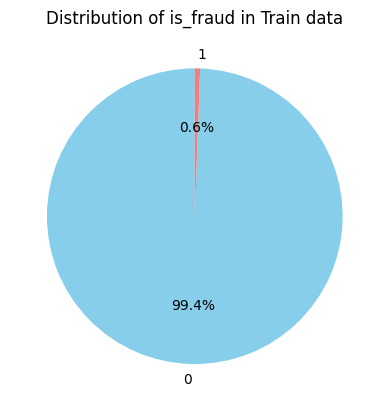

0    1289169
1       7506
Name: is_fraud, dtype: int64


In [ ]:
import matplotlib.pyplot as plt

# Assuming 'is_fraud' is the target variable
value_counts = data['is_fraud'].value_counts()

# Define colors for the pie chart
colors = ['skyblue', 'lightcoral']

# Plot the pie chart
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of is_fraud in Train data')
plt.show()

print(value_counts)


# Data Split

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)


In [ ]:
import numpy as np
train_data['log_amt'] = np.log(train_data['amt'])
test_data['log_amt'] = np.log(test_data['amt'])

In [ ]:
from math import radians, sin, cos, sqrt, atan2
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the Earth in kilometers
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = sin(dlat / 2) ** 2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon / 2) ** 2
    distance = 2 * R * atan2(sqrt(a), sqrt(1 - a))
    return distance

# Apply Haversine function to create the "Distance" column
train_data['distanceInKM'] = train_data.apply(lambda row: haversine(row['lat'], row['long'], row['merch_lat'], row['merch_long']), axis=1)
test_data['distanceInKM'] = test_data.apply(lambda row: haversine(row['lat'], row['long'], row['merch_lat'], row['merch_long']), axis=1)
# Verify

In [ ]:
# Verify
print(train_data[['lat','long','merch_lat','merch_long','distanceInKM']].head())

             lat      long  merch_lat  merch_long  distanceInKM
330201   30.6576  -91.6264  31.189017  -91.426377     62.094877
798518   48.3400 -122.3456  47.373663 -122.739095    111.389951
1260375  32.3836  -94.8653  31.989881  -95.371119     64.671847
412511   44.8605  -85.8138  45.377530  -86.450595     76.168531
344644   41.5378  -88.0572  42.372906  -87.112752    121.333390


In [ ]:
train_data['trans_datetime'] = pd.to_datetime(train_data['trans_date_trans_time'])
train_data['DayOfWeek'] = train_data['trans_datetime'].dt.dayofweek # 0 to 6

test_data['trans_datetime'] = pd.to_datetime(test_data['trans_date_trans_time'])
test_data['DayOfWeek'] = test_data['trans_datetime'].dt.dayofweek # 0 to 6

In [ ]:
# Apply sine and cosine transformations
train_data['DayOfWeekSin'] = np.sin(2 * np.pi * train_data['DayOfWeek'] / 7)
train_data['DayOfWeekCos'] = np.cos(2 * np.pi * train_data['DayOfWeek'] / 7)

test_data['DayOfWeekSin'] = np.sin(2 * np.pi * test_data['DayOfWeek'] / 7)
test_data['DayOfWeekCos'] = np.cos(2 * np.pi * test_data['DayOfWeek'] / 7)

In [ ]:
train_data['dob'] = pd.to_datetime(train_data['dob'])
train_data['age'] = np.ceil((train_data['trans_datetime'] - train_data['dob']).dt.days / 365).astype(int)

test_data['dob'] = pd.to_datetime(test_data['dob'])
test_data['age'] = np.ceil((test_data['trans_datetime'] - test_data['dob']).dt.days / 365).astype(int)

In [ ]:
# Verify
print(train_data[['dob', 'trans_datetime', 'age']].head())

               dob      trans_datetime  age
330201  1951-06-13 2019-06-06 14:43:31   69
798518  1984-09-01 2019-12-03 19:26:48   36
1260375 1983-10-14 2020-06-08 12:02:43   37
412511  1975-10-11 2019-07-06 01:46:54   44
344644  1992-01-20 2019-06-10 23:34:00   28


In [ ]:
category_columns = train_data.filter(like='category_', axis=1).astype(int)
gender_columns = train_data.filter(like='gender_', axis=1).astype(int)
X_train = pd.concat([train_data[['city_pop', 'log_amt', 'DayOfWeekSin', 'DayOfWeekCos', 'age', 'distanceInKM']], category_columns, gender_columns], axis=1)
y_train = train_data['is_fraud']

In [ ]:
category_columns = test_data.filter(like='category_', axis=1).astype(int)
gender_columns = test_data.filter(like='gender_', axis=1).astype(int)
X_test = pd.concat([test_data[['city_pop', 'log_amt', 'DayOfWeekSin', 'DayOfWeekCos', 'age', 'distanceInKM']], category_columns, gender_columns], axis=1)
y_test = test_data['is_fraud']

# Random Forest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)


# Evaluate the model


In [ ]:
# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

print(f'Random Forest Model Metrics:')
print(f'Accuracy: {accuracy_rf}')
print(f'Confusion Matrix:\n{conf_matrix_rf}')
print(f'Classification Report:\n{classification_rep_rf}')


Random Forest Model Metrics:
Accuracy: 0.9952648119228026
Confusion Matrix:
[[257618    197]
 [  1031    489]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.71      0.32      0.44      1520

    accuracy                           1.00    259335
   macro avg       0.85      0.66      0.72    259335
weighted avg       0.99      1.00      0.99    259335



# Plotting confusion matrix


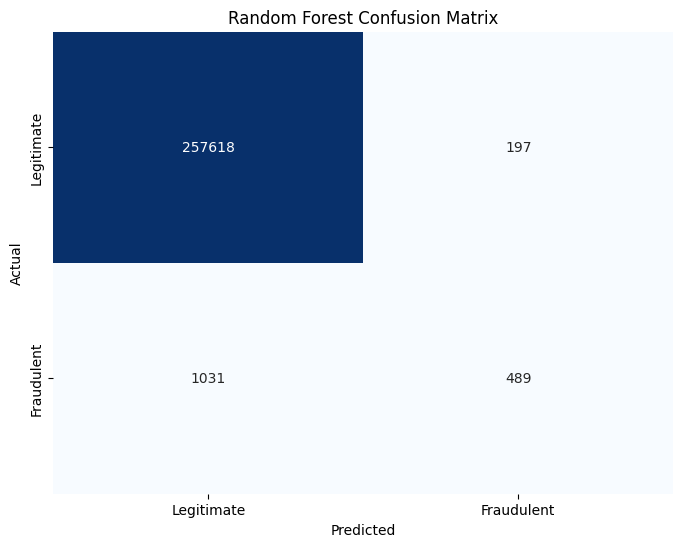

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Legitimate', 'Fraudulent'],
            yticklabels=['Legitimate', 'Fraudulent'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9941388551487458
Confusion Matrix:
[[257815      0]
 [  1520      0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    257815
           1       0.00      0.00      0.00      1520

    accuracy                           0.99    259335
   macro avg       0.50      0.50      0.50    259335
weighted avg       0.99      0.99      0.99    259335



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Logistic Regression Model:
- **Accuracy:** The overall accuracy of the Logistic Regression model is high (99.41%). However, accuracy alone may not be a reliable metric, especially when dealing with imbalanced datasets.
- **Confusion Matrix:** The model predicts all instances as non-fraudulent (class 0), leading to a confusion matrix where there are no true positives (1520 fraudulent cases are predicted as non-fraudulent).
- **Precision, Recall, and F1-Score:** The precision, recall, and F1-score for class 1 (fraudulent) are all zero. This indicates that the model is not able to correctly identify any fraudulent cases.

### Random Forest Model:
- **Accuracy:** The Random Forest model also achieved high accuracy (99.53%), similar to Logistic Regression.
- **Confusion Matrix:** The model predicts some instances as fraudulent (class 1), leading to a confusion matrix with both true positives and false positives.
- **Precision, Recall, and F1-Score:** The precision for class 1 is 0.71, indicating that when the model predicts fraud, it is correct about 71% of the time. However, the recall (sensitivity) is relatively low (32%), indicating that the model misses a significant number of actual fraudulent cases.

### Short Observation:
- The Logistic Regression model seems to struggle in identifying fraudulent cases, as it predicts all instances as non-fraudulent, resulting in a recall, precision, and F1-score of zero for class 1.
- The Random Forest model shows better performance in detecting fraud, with a non-zero precision, but it still has a relatively low recall. This suggests that the Random Forest model is better at identifying some fraudulent cases but misses others.

In practice, the choice of metrics (precision, recall, F1-score) depends on the specific goals and constraints of your fraud detection problem. It might be necessary to further tune the models, explore additional features, or consider other algorithms that handle imbalanced datasets more effectively.